<a href="https://colab.research.google.com/github/savio-sandesh/Machine_Learning/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# Dataset Link :- https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [87]:
# Importing necessary libraries for data analysis, visualization, and machine learning import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression

In [88]:
# read the dataset
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [89]:
# Getting the shape of the DataFrame
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [90]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [91]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [92]:
# .map funtion --> create a dictionary
df['gender'].unique()
df['gender']=df['gender'].map({"Male":1,"Female":2,"Other":0})

In [93]:
df['smoking_history'].unique()
df['smoking_history'] = df['smoking_history'].map({"never":1,"No Info":2,"current":3,"former":4,"ever":5,"not current":6})

In [94]:
# Displaying the last 5 rows of the DataFrame
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.585340,41.885856,0.07485,0.039420,2.306950,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.454501,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,1.000000,10.010000,3.500000,80.000000,0.000000
25%,1.000000,24.000000,0.00000,0.000000,1.000000,23.630000,4.800000,100.000000,0.000000
50%,2.000000,43.000000,0.00000,0.000000,2.000000,27.320000,5.800000,140.000000,0.000000
75%,2.000000,60.000000,0.00000,0.000000,3.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,6.000000,95.690000,9.000000,300.000000,1.000000


In [95]:
# Computing the correlation matrix
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.030656,-0.014203,-0.077696,-0.054330,0.022994,-0.019957,-0.017199,-0.037411
age,0.030656,1.000000,0.251171,0.233354,0.143647,0.337396,0.101354,0.110672,0.258008
hypertension,-0.014203,0.251171,1.000000,0.121262,0.031913,0.147666,0.080939,0.084429,0.197823
heart_disease,-0.077696,0.233354,0.121262,1.000000,0.071547,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.054330,0.143647,0.031913,0.071547,1.000000,0.068321,0.023195,0.023031,0.057908
bmi,0.022994,0.337396,0.147666,0.061198,0.068321,1.000000,0.082997,0.091261,0.214357
HbA1c_level,-0.019957,0.101354,0.080939,0.067589,0.023195,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,-0.017199,0.110672,0.084429,0.070066,0.023031,0.091261,0.166733,1.000000,0.419558
diabetes,-0.037411,0.258008,0.197823,0.171727,0.057908,0.214357,0.400660,0.419558,1.000000


In [96]:
# Checking for missing values in the DataFrame
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


<Axes: >

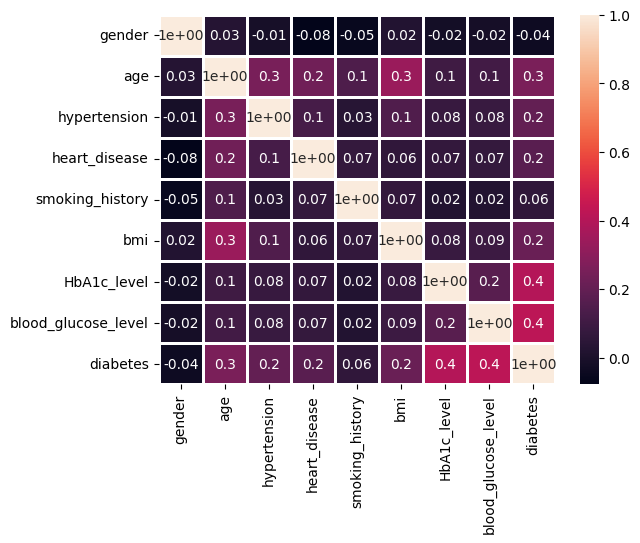

In [97]:
sns.heatmap(df.corr(),annot=True,linewidth=2,fmt='0.1')

<ipython-input-98-fb2a4bb04198>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette=['g','r'])


Text(0.5, 1.0, 'Counting Diabetes')

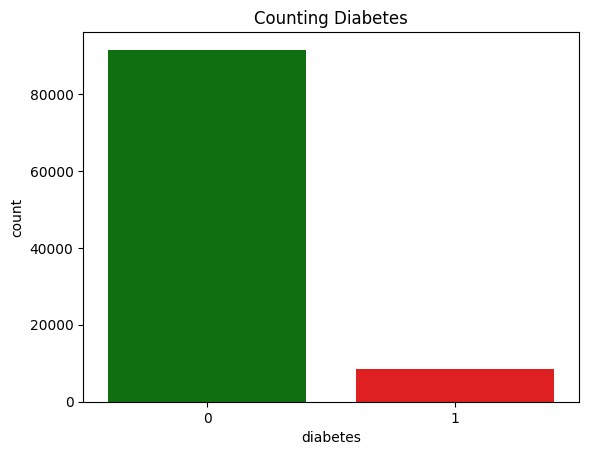

In [98]:
sns.countplot(x='diabetes', data=df, palette=['g','r'])
plt.title('Counting Diabetes')

<Axes: >

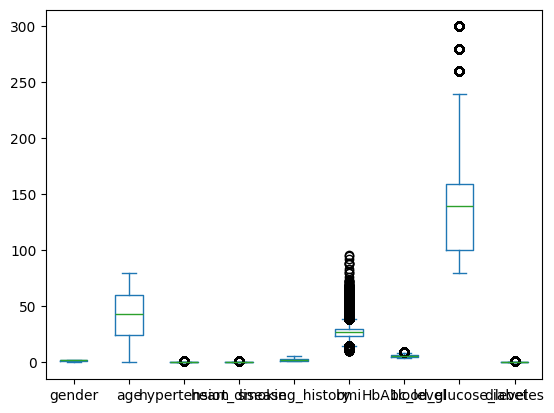

In [99]:
df.plot(kind='box')

In [100]:
y=df["diabetes"]
df.drop("diabetes",axis=1,inplace=True)
x=df

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [102]:
x_test.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [103]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,precision_score

In [105]:
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 0.93875
